# **PyTorch ANN - IRIS Data Prediction**
---
---

## **Perform standard imports**

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

## **Create a Model Class**

In [2]:
class Model(nn.Module):

  def __init__(self, in_features =4, h1=8, h2=9, out_features=3):

    # how many Layers?
    # input Layer (4 Feature) -> H1 (8 Neuron) -> H2 (9 Neuron) -> Outplut (3 Categories)

    super().__init__()
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)


  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


## **Mount Google Drive**

In [3]:
torch.manual_seed(32)
model = Model()

In [4]:
from google.colab import drive

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


## **Load the IRIS Dataset**

In [6]:
import pandas as pd
import numpy as np

In [77]:
df = pd.read_csv("/content/drive/MyDrive/Jose Potilla | Pytorch/Data/iris.csv")

In [78]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


## **Split X & y Data**

In [79]:
X = df.drop('target', axis = 1).values
y = df['target'].values

## **Perform Test Train Split**

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 33, test_size = 0.2)

In [81]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [82]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

## **Prepare Data Loader**

In [83]:
from torch.utils.data import Dataset, DataLoader

trainloader = DataLoader(X_train, batch_size=60, shuffle=True)

testloader = DataLoader(X_test, batch_size=60, shuffle=False)

## **Define Loss and Optimizer**

In [84]:
# FOR REDO
torch.manual_seed(4)
model = Model()

In [85]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [86]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

## **Train Model**

In [87]:
epochs = 100
losses = []

for i in range(epochs):

  i = i+1

  # Forward and get a prediction
  y_pred = model.forward(X_train)

  # Calculate loss/error
  loss = criterion(y_pred, y_train)

  # Store Loss
  losses.append(loss)

  # Trick to Save the screen space:
  if i%10 == 0:
    print(f"Epoch {i} and loss is : {loss}")



  # BACKPROPAGATION
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch 10 and loss is : 0.9953120350837708
Epoch 20 and loss is : 0.7865304350852966
Epoch 30 and loss is : 0.5158728957176208
Epoch 40 and loss is : 0.3626713454723358
Epoch 50 and loss is : 0.24050042033195496
Epoch 60 and loss is : 0.14223681390285492
Epoch 70 and loss is : 0.0944901704788208
Epoch 80 and loss is : 0.07497227191925049
Epoch 90 and loss is : 0.06607463210821152
Epoch 100 and loss is : 0.06124770641326904


## **Plot Loss Fuction from Training**

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
losses

[tensor(1.0957, grad_fn=<NllLossBackward0>),
 tensor(1.0804, grad_fn=<NllLossBackward0>),
 tensor(1.0703, grad_fn=<NllLossBackward0>),
 tensor(1.0609, grad_fn=<NllLossBackward0>),
 tensor(1.0507, grad_fn=<NllLossBackward0>),
 tensor(1.0400, grad_fn=<NllLossBackward0>),
 tensor(1.0291, grad_fn=<NllLossBackward0>),
 tensor(1.0183, grad_fn=<NllLossBackward0>),
 tensor(1.0072, grad_fn=<NllLossBackward0>),
 tensor(0.9953, grad_fn=<NllLossBackward0>),
 tensor(0.9819, grad_fn=<NllLossBackward0>),
 tensor(0.9669, grad_fn=<NllLossBackward0>),
 tensor(0.9504, grad_fn=<NllLossBackward0>),
 tensor(0.9322, grad_fn=<NllLossBackward0>),
 tensor(0.9122, grad_fn=<NllLossBackward0>),
 tensor(0.8905, grad_fn=<NllLossBackward0>),
 tensor(0.8670, grad_fn=<NllLossBackward0>),
 tensor(0.8419, grad_fn=<NllLossBackward0>),
 tensor(0.8150, grad_fn=<NllLossBackward0>),
 tensor(0.7865, grad_fn=<NllLossBackward0>),
 tensor(0.7565, grad_fn=<NllLossBackward0>),
 tensor(0.7259, grad_fn=<NllLossBackward0>),
 tensor(0.

In [90]:
# use torch.Tensor.detach

# a = torch.stack(losses).cpu().detach().numpy()
a = torch.stack(losses).detach()

In [91]:
a

tensor([1.0957, 1.0804, 1.0703, 1.0609, 1.0507, 1.0400, 1.0291, 1.0183, 1.0072,
        0.9953, 0.9819, 0.9669, 0.9504, 0.9322, 0.9122, 0.8905, 0.8670, 0.8419,
        0.8150, 0.7865, 0.7565, 0.7259, 0.6967, 0.6698, 0.6440, 0.6181, 0.5912,
        0.5645, 0.5392, 0.5159, 0.4945, 0.4749, 0.4528, 0.4368, 0.4245, 0.4113,
        0.3978, 0.3854, 0.3743, 0.3627, 0.3498, 0.3378, 0.3267, 0.3143, 0.3009,
        0.2890, 0.2769, 0.2639, 0.2523, 0.2405, 0.2281, 0.2172, 0.2058, 0.1952,
        0.1853, 0.1752, 0.1665, 0.1575, 0.1499, 0.1422, 0.1355, 0.1291, 0.1233,
        0.1180, 0.1130, 0.1087, 0.1045, 0.1009, 0.0975, 0.0945, 0.0916, 0.0891,
        0.0867, 0.0846, 0.0826, 0.0809, 0.0792, 0.0777, 0.0763, 0.0750, 0.0738,
        0.0726, 0.0716, 0.0706, 0.0698, 0.0689, 0.0682, 0.0674, 0.0667, 0.0661,
        0.0655, 0.0649, 0.0643, 0.0638, 0.0633, 0.0629, 0.0625, 0.0620, 0.0616,
        0.0612])

Text(0.5, 0, 'epoch')

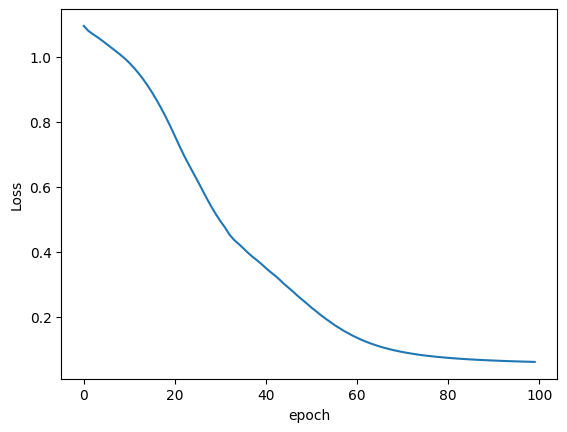

In [92]:
plt.plot(range(epochs), a)
plt.ylabel('Loss')
plt.xlabel('epoch')

## **Validate The Model**

In [93]:
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)

In [94]:
loss

tensor(0.0625)

In [99]:
# 'correct' is for detecting correct value

correct = 0

with torch.no_grad():

  for i, data in enumerate(X_test):

    y_val = model.forward(data)

    print (f"{i+1}.)  {str(y_val)}  {y_test[i]}")

    if y_val.argmax().item() == y_test[i]:
      correct =correct + 1

print("Predicted Correct Items are {}", correct)

1.)  tensor([-0.3360,  7.3629,  1.3780])  1
2.)  tensor([0.2770, 8.1552, 0.4267])  1
3.)  tensor([ 11.9968,   6.1842, -19.1980])  0
4.)  tensor([-2.0192,  7.9662,  4.2445])  1
5.)  tensor([-6.1353,  7.9516, 11.0908])  2
6.)  tensor([-10.2640,   8.3102,  17.9992])  2
7.)  tensor([ 12.0541,   6.4316, -19.2913])  0
8.)  tensor([ 12.9496,   6.4815, -20.7530])  0
9.)  tensor([-5.7727,  8.2435, 10.5079])  2
10.)  tensor([-7.8872,  8.6126, 14.0726])  2
11.)  tensor([-8.7060,  8.6074, 15.4331])  2
12.)  tensor([ 11.6348,   5.8164, -18.6210])  0
13.)  tensor([-8.1013,  8.2331, 14.3883])  2
14.)  tensor([-2.0796,  7.7751,  4.3185])  1
15.)  tensor([-6.0833,  8.3916, 11.0582])  2
16.)  tensor([0.1354, 7.8658, 0.6407])  1
17.)  tensor([-4.0880,  7.7216,  7.6638])  2
18.)  tensor([ 13.1511,   6.5907, -21.0787])  0
19.)  tensor([-1.5649,  8.0220,  3.4751])  1
20.)  tensor([-6.2865,  8.9727, 11.4244])  2
21.)  tensor([ 12.3848,   6.2568, -19.8265])  0
22.)  tensor([ 13.8199,   7.0854, -22.1532])  0
2

## **Save Model to file**

In [100]:
torch.save(model.state_dict(), 'My_Iris_Model.pt')
print("Our Model is Saved Now")

Our Model is Saved Now


## **Load Saved Model**

In [101]:
new_model = Model()
new_model.load_state_dict(torch.load('My_Iris_Model.pt'))

<All keys matched successfully>

In [111]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

## **Apply the Model to Prdict on Unknow Data**

In [119]:
mystery_data = torch.Tensor([5.6, 3.7,2.2, 0.5])

In [120]:
mystery_data

tensor([5.6000, 3.7000, 2.2000, 0.5000])

In [123]:
with torch.no_grad():

  print(new_model(mystery_data))
  print(y_val.argmax().item())

tensor([ 12.2112,   7.1279, -19.5248])
0


---
# **The End**





